In [1]:
from Environment.ExpUserClass import ExpUserClass
from Learners.UCB1_Learner import UCB1_Learner
from Learners.TS_Learner import TS_Learner

import numpy as np
import matplotlib.pyplot as plt
import time

0.13422463113699354
{20: 0.11378848728246313, 22: 0.13641060971408892, 24: 0.13582135209544194, 26: 0.10420841683366727, 28: 0.08982035928143697}


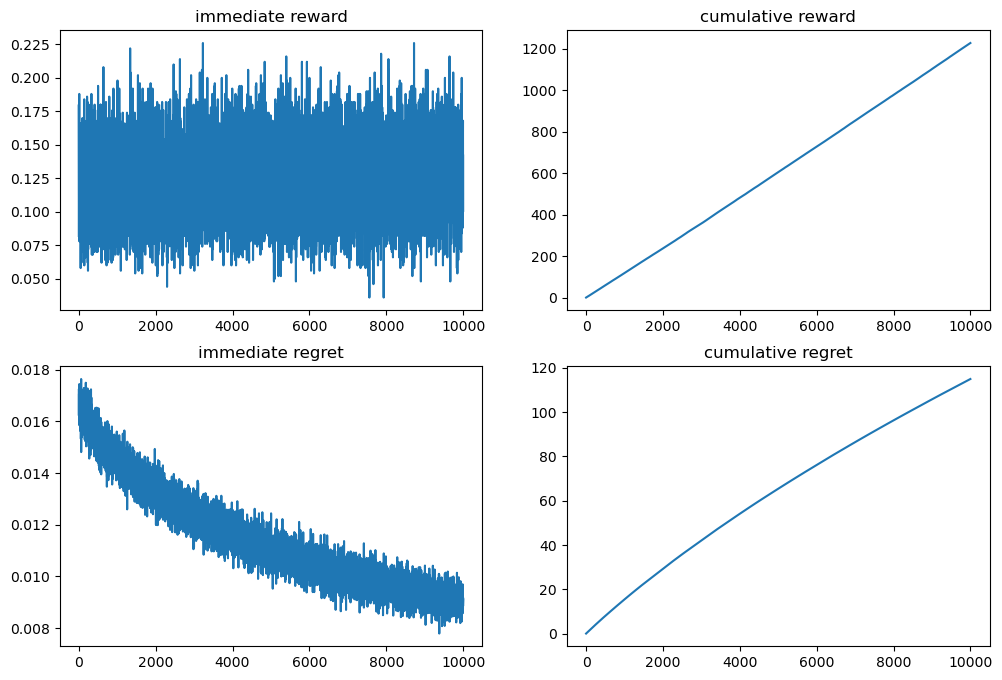

In [3]:
env = ExpUserClass()

reward = []
regret = []
clarvoyant_reward = env.conversion[24] * 6
print(clarvoyant_reward)

for c in range(1000):
    learner = TS_Learner([20, 22, 24, 26, 28], max_reward=10)
    reward.append([])
    regret.append([])
    for i in range(10000):
        arm = learner.pull_arm()
        r = env.pull_user(arm) * (arm - 18)
        learner.update(arm, r)
        reward[c].append(r)

        exp_reward = env.conversion[arm] * (arm - 18)
        regret[c].append(clarvoyant_reward - exp_reward)

print(learner.get_values())

reward = np.array(reward)
cum_reward = np.cumsum(reward, axis=1)
regret = np.array(regret)
cum_regret = np.cumsum(regret, axis=1)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].plot(np.mean(reward, axis=0))
axs[0].set_title("immediate reward")
axs[1].plot(np.mean(cum_reward, axis=0))
axs[1].set_title("cumulative reward")
axs[2].plot(np.mean(regret, axis=0))
axs[2].set_title("immediate regret")
axs[3].plot(np.mean(cum_regret, axis=0))
axs[3].set_title("cumulative regret")

plt.show()